# Project Description

For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you've developed. This dataset and its parameters will seem familiar if you've done any of the previous Python projects in the data science path.

However, you're now tasked with working with the actual information in the dataset and performing your own independent analysis on real-world data! We will not be providing step-by-step instructions on what to do, but we will provide you with a framework to structure your exploration and analysis.For this project, you will be investigating a medical insurance costs dataset in a .csv file using the Python skills that you've developed. This dataset and its parameters will seem familiar if you've done any of the previous Python projects in the data science path.

However, you're now tasked with working with the actual information in the dataset and performing your own independent analysis on real-world data! We will not be providing step-by-step instructions on what to do, but we will provide you with a framework to structure your exploration and analysis.

# Project Objectives

- Work locally on your own computer
- Import a dataset into your program
- Analyze a dataset by building out functions or class methods
- Use libraries to assist in your analysis
- Optional: Document and organize your findings
- Optional: Make predictions about a dataset’s features based on your findings

# Project Requirements

- This project was built using Python 3.11 and Jupyter Notebook.
- You will need to install the following libraries:
    - matplotlib (For data visualization, this is not a requirement, but plots won't be shown if you don't have it installed)

# Project: U.S. Medical Insurance Costs

A dataset containing information on medical insurance costs for individuals in the United States was provided by Codecademy.
To learn about the dataset, I first want to explore the data and get a feel for what it contains.
For that, I will use python to import the CSV file and print the headers and the number of rows.

I'm also going to save the contents of the CSV file in a list of dictionaries, where each dictionary represents a row of the dataset.
I will do this to avoid having to read the CSV file multiple times.

Note: This next cell *needs* to be run first, otherwise the rest of the notebook will not work.

In [1]:
import csv

# Modify this if the file is in a different location
FILE_PATH = '../data/raw/insurance.csv'

# Read the CSV file and save the contents in a list of dictionaries
with open(FILE_PATH) as insurance_csv:
    insurance_dict = csv.DictReader(insurance_csv)
    INSURANCE_DATA = list(insurance_dict)

    # Show the information of the dataset
    print('Headers:', insurance_dict.fieldnames)
    print('Number of rows:', len(INSURANCE_DATA))

Headers: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Number of rows: 1338


## What I found
From the headers, we can see that the data is organized by the following:
(The Data type is not included in the headers, but I will include it in the table below)

| Field Name | Data Type |
|------------|-----------|
| age        | int       |
| sex        | str       |
| bmi        | float     |
| children   | int       |
| smoker     | str       |
| region     | str       |
| charges    | float     |

There are 1338 rows in the dataset.

Additionally, Codecademy provided the following information about the dataset:

- There is no missing data (the dataset has been cleaned too).
- There are seven columns.
- Some columns are numerical while some are categorical.

## What I would change about the dataset

I would change the data type of the `sex` and `smoker` fields to be `bool` instead of `str`.
This would make it easier to work with the data in Python.
This wasn't done in this project because the focus was on learning how to work with data in Python, not on cleaning the data.

# Exploring the data

Now that I know how the dataset is organized, I'm going to explore the dataset by exploring different fields and their statistics.

### Statistics (Numerical Fields)

First, I want to find the average, median, mode, and standard deviation of each field. This will give me a general idea of the data.
Additionally, I will add a boxplot to visualize the data for each field.

#### Average, median, mode, standard deviation and percentiles

To find the average, median, mode, standard deviation and percentiles of each field, I will create functions for each of these statistics.

##### Average

In [2]:
def find_average_on_numeric_field(data: list[dict], field_name: str) -> float:
    """
    Find the average of a numeric field in a list of dictionaries.
    The average is rounded to two decimal places.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the average of.

    Returns:
        float: The average of the field.
    """
    return round(sum([float(row[field_name]) for row in data]) / len(data), 2)

##### Median

In [3]:
def find_median_on_numeric_field(data: list[dict], field_name: str) -> float:
    """
    Find the median of a numeric field in a list of dictionaries.
    The median is rounded to two decimal places.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the median of.

    Returns:
        float: The median of the field.
    """
    sorted_data = sorted([float(row[field_name]) for row in data])
    if len(sorted_data) % 2 == 0:
        calculated_median = (sorted_data[len(sorted_data) // 2] + sorted_data[len(sorted_data) // 2 - 1]) / 2
    else:
        calculated_median = sorted_data[len(sorted_data) // 2]

    return round(calculated_median, 2)

##### Mode

In [4]:
def find_mode_on_numeric_field(data: list[dict], field_name: str):
    """
    Find the mode of a numeric field in a list of dictionaries.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the mode of.

    Returns:
        tuple: The mode of the field and the number of times the mode appears.
    """
    value_counts = {}
    for row in data:
        if float(row[field_name]) in value_counts:
            value_counts[float(row[field_name])] += 1
        else:
            value_counts[float(row[field_name])] = 1

    calculated_mode = max(value_counts, key=value_counts.get)
    return calculated_mode, value_counts[calculated_mode]

##### Standard Deviation

In [5]:
def find_standard_deviation_on_numeric_field(data: list[dict], field_name: str) -> float:
    """
    Find the standard deviation of a numeric field in a list of dictionaries.
    The standard deviation is rounded to two decimal places.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the standard deviation of.

    Returns:
        float: The standard deviation of the field.
    """
    calculated_average = find_average_on_numeric_field(data, field_name)
    sum_of_squared_differences = sum([(float(row[field_name]) - calculated_average) ** 2 for row in data])
    return round((sum_of_squared_differences / len(data)) ** 0.5, 2)

##### Percentiles

In [6]:
def find_percentiles_on_numeric_field(data: list[dict], field_name: str) -> tuple[float, float, float]:
    """
    Find the 25th, 50th, and 75th percentiles of a numeric field in a list of dictionaries.
    The percentiles are rounded to two decimal places.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the percentiles of.

    Returns:
        tuple: The 25th, 50th, and 75th percentiles of the field.
    """
    sorted_data = sorted([float(row[field_name]) for row in data])

    percentile_25 = round(sorted_data[len(sorted_data) // 4], 2)
    percentile_50 = round(sorted_data[len(sorted_data) // 2], 2)
    percentile_75 = round(sorted_data[len(sorted_data) // 4 * 3], 2)

    return percentile_25, percentile_50, percentile_75

##### Testing the functions

Now that I've established the functions, I will use them to find the statistics for each field.

In [7]:
def find_numeric_field_statistics(numeric_fields: list[str]):
    """
    Find the average, median, mode, standard deviation, and percentiles of a list of numeric fields.

    Args:
        numeric_fields (list): A list of numeric fields to find the statistics of.
    """
    for numeric_field in numeric_fields:
        average = find_average_on_numeric_field(INSURANCE_DATA, numeric_field)
        median = find_median_on_numeric_field(INSURANCE_DATA, numeric_field)
        mode, mode_count = find_mode_on_numeric_field(INSURANCE_DATA, numeric_field)
        standard_deviation = find_standard_deviation_on_numeric_field(INSURANCE_DATA, numeric_field)
        percentiles = find_percentiles_on_numeric_field(INSURANCE_DATA, numeric_field)

        print(f'Field: {numeric_field}'
              f'\n\tAverage: {average}'
              f'\n\tMedian: {median}'
              f'\n\tMode: {mode} ({mode_count} times)'
              f'\n\tStandard Deviation: {standard_deviation}'
              f'\n\tPercentiles:'
              f'\n\t\t25th: {percentiles[0]}'
              f'\n\t\t50th: {percentiles[1]}'
              f'\n\t\t75th: {percentiles[2]}'
              f'\n')


NUMERIC_FIELDS = ['age', 'bmi', 'children', 'charges']
find_numeric_field_statistics(NUMERIC_FIELDS)

Field: age
	Average: 39.21
	Median: 39.0
	Mode: 18.0 (69 times)
	Standard Deviation: 14.04
	Percentiles:
		25th: 27.0
		50th: 39.0
		75th: 51.0

Field: bmi
	Average: 30.66
	Median: 30.4
	Mode: 32.3 (13 times)
	Standard Deviation: 6.1
	Percentiles:
		25th: 26.29
		50th: 30.4
		75th: 34.67

Field: children
	Average: 1.09
	Median: 1.0
	Mode: 0.0 (574 times)
	Standard Deviation: 1.21
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Field: charges
	Average: 13270.42
	Median: 9382.03
	Mode: 1639.5631 (2 times)
	Standard Deviation: 12105.48
	Percentiles:
		25th: 4738.27
		50th: 9386.16
		75th: 16586.5


#### Box Plots

For visualization purposes (Which is not an original objective of the project), I will create box plots for each of the numeric fields.

I will use the [matplotlib](https://matplotlib.org/) library to create the box plots. I will also use matplotlib to create multiple plots later on.

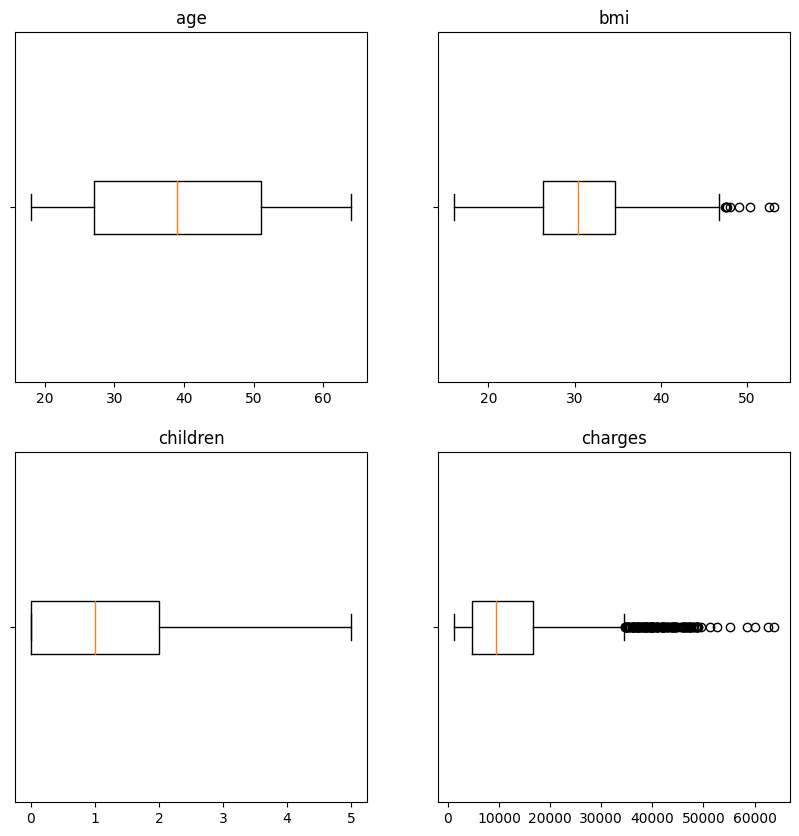

In [8]:
def plot_box_plots_for_numerical_fields(data, numeric_fields):
    from matplotlib import pyplot as plt

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    for i, numeric_field in enumerate(numeric_fields):
        plot_row = i // 2
        plot_col = i % 2

        values = [float(row[numeric_field.lower()]) for row in data]
        axes[plot_row, plot_col].boxplot(values, vert=False)
        axes[plot_row, plot_col].set_title(numeric_field)
        axes[plot_row, plot_col].set_yticklabels([])

    plt.show()


plot_box_plots_for_numerical_fields(INSURANCE_DATA, NUMERIC_FIELDS)

#### Histograms

The last visualization I will create is a histogram for each of the numeric fields. This can further help us visualize the data before finding the relationships between the fields and other tests.

First, I will create a function to create the histograms.

In [9]:
def plot_histograms_for_numerical_fields(data, numeric_fields):
    from matplotlib import pyplot as plt

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    for i, numeric_field in enumerate(numeric_fields):
        plot_row = i // 2
        plot_col = i % 2

        values = [float(row[numeric_field.lower()]) for row in data]

        axes[plot_row, plot_col].hist(values)
        axes[plot_row, plot_col].set_title(numeric_field)

    plt.show()

Then the plots can be created.

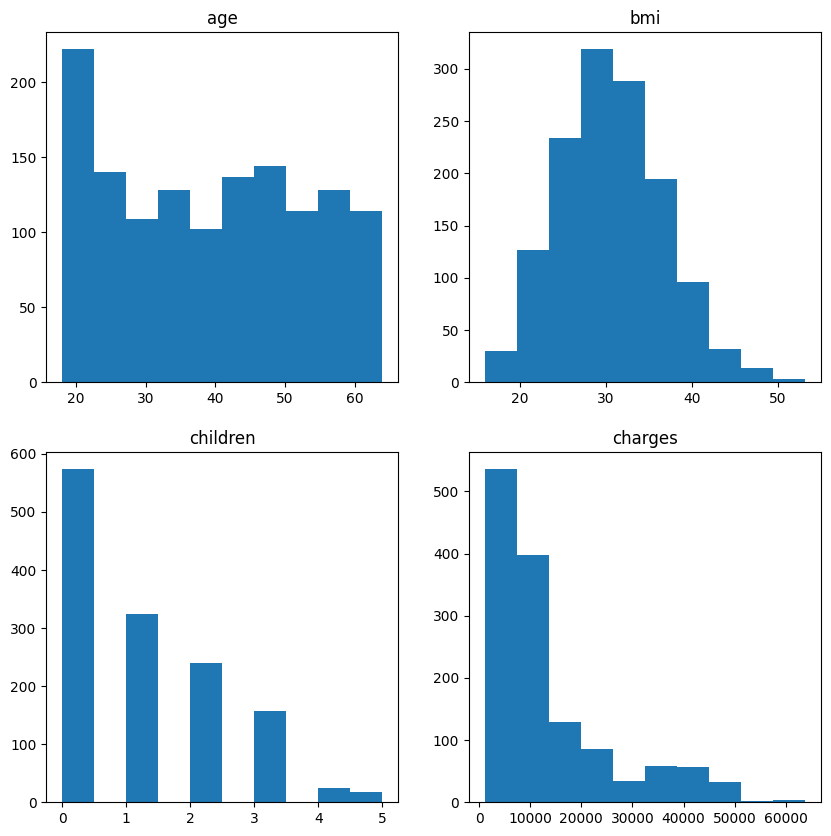

In [10]:
plot_histograms_for_numerical_fields(INSURANCE_DATA, NUMERIC_FIELDS)

### Statistics (Categorical Fields)

Now that I've found the statistics for the numeric fields, I will find the statistics for the categorical fields.

Unlike the numeric fields, the categorical fields will not have a median, mode, or standard deviation. However, they will have a mode with its corresponding count.

For this, I will create a function to find the mode of a categorical field.

#### Mode

In [11]:
def find_mode_on_categorical_field(data: list[dict], field_name: str):
    """
    Find the mode of a categorical field in a list of dictionaries.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the mode of.

    Returns:
        tuple: The mode of the field and the number of times the mode appears.
    """
    value_counts = {}
    for row in data:
        if row[field_name] in value_counts:
            value_counts[row[field_name]] += 1
        else:
            value_counts[row[field_name]] = 1

    calculated_mode = max(value_counts, key=value_counts.get)
    return calculated_mode, value_counts[calculated_mode]

Now that I've created the function, I will use it to find the mode of each categorical field.

In [12]:
def find_categorical_field_statistics(categorical_fields: list[str]):
    """
    Find the mode of a categorical field in a list of dictionaries.

    Args:
        categorical_fields (list): A list of categorical fields to find the mode of.
    """
    for categorical_field in categorical_fields:
        mode, mode_count = find_mode_on_categorical_field(INSURANCE_DATA, categorical_field)
        print(f'Field: {categorical_field}'
              f'\n\tMode: {mode} ({mode_count} times)'
              f'\n')


CATEGORICAL_FIELDS = ['sex', 'smoker', 'region']
find_categorical_field_statistics(CATEGORICAL_FIELDS)

Field: sex
	Mode: male (676 times)

Field: smoker
	Mode: no (1064 times)

Field: region
	Mode: southeast (364 times)


### Relationships

Now that I've found the statistics for the fields, I will find the relationships between the fields.

These relationships will be first order relationships. This means that I will only be looking at the relationship between two fields at a time.

The relationships I will be looking at are:
- Age and BMI
- Age and Children
- Age and Charges
- BMI and Children
- BMI and Charges
- Children and Charges

Additionally, for categorical fields, I will be looking at the relationship between the categorical field's different unique values and the charges, which are:
- Sex: "male" or "female"
- Smoker: "yes" or "no"
- Region: "northeast", "northwest", "southeast", or "southwest"

#### Relationships (Numeric Fields)

To find the relationships between the numeric fields, I will create a function to find the lowest and highest values of a field. This will be used to divide the leading field into groups. The leading field is the field that will be divided into groups. The trailing field is the field that will be compared to the groups of the leading fields.

In [13]:
def find_lowest_and_highest_values(data: list[dict], field_name: str):
    """
    Find the lowest and highest values of a field in a list of dictionaries.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the lowest and highest values of.

    Returns:
        tuple: The lowest and highest values of the field.
    """
    values = [float(row[field_name]) for row in data]
    return min(values), max(values)

I will now make a function that takes a dataset, a leading field, a trailing field, and the number of groups to divide the leading field into. This function will divide the leading field into groups.

In [14]:
def divide_leading_field_into_groups(data: list[dict], leading_field_name: str, num_groups: int):
    """
    Divide a leading field into groups.

    Args:
        data (list): A list of dictionaries.
        leading_field_name (str): The name of the leading field.
        num_groups (int): The number of groups to divide the leading field into.

    Returns:
        list: A list of tuples, where each tuple contains the lower and upper bounds of a group.
    """
    lowest_value, highest_value = find_lowest_and_highest_values(data, leading_field_name)

    group_size = (highest_value - lowest_value) // num_groups  # use integer division to get an integer group size
    groups = [(lowest_value + (group_size * i), lowest_value + (group_size * (i + 1) - 1))
              for i in range(num_groups)]
    groups.append((lowest_value + (group_size * num_groups), highest_value))

    return groups

Now I can implement a function that takes in a dataset, a leading field, a trailing field, and the number of groups to divide the leading field into. This function will return the statistics of the trailing field for each group of the leading fields. I will also implement sub-functions to find the median, mode, standard deviation and percentiles of a list of values to find the statistics of the trailing field.

In [15]:
def find_median(values: list[float]):
    values.sort()
    if len(values) % 2 == 0:
        calculated_median = (values[len(values) // 2] + values[len(values) // 2 - 1]) / 2
    else:
        calculated_median = values[len(values) // 2]
    return calculated_median


def find_mode(values: list[float]):
    value_counts = {}

    for value in values:
        if value in value_counts:
            value_counts[value] += 1
        else:
            value_counts[value] = 1
    calculated_mode = max(value_counts, key=value_counts.get)
    return calculated_mode


def find_average(values: list[float]):
    return sum(values) / len(values)


def find_standard_deviation(values: list[float]):
    calculated_average = find_average(values)
    return (sum([(value - calculated_average) ** 2 for value in values]) / len(values)) ** 0.5


def find_percentiles(values: list[float]):
    values.sort()
    percentile_25 = values[len(values) // 4]
    percentile_50 = values[len(values) // 2]
    percentile_75 = values[len(values) // 4 * 3]
    return percentile_25, percentile_50, percentile_75


def find_relationship_between_two_numeric_fields(data: list[dict],
                                                 leading_field_name: str,
                                                 trailing_field_name: str,
                                                 num_groups: int):
    """
    Find the relationship between two numeric fields.

    Args:
        data (list): A list of dictionaries.
        leading_field_name (str): The name of the leading field.
        trailing_field_name (str): The name of the trailing field.
        num_groups (int): The number of groups to divide the leading field into.

    Returns:
        dict: A dictionary where the keys are the groups of the leading fields and the values are the statistics of the trailing field.
    """
    groups = divide_leading_field_into_groups(data, leading_field_name, num_groups)
    calculated_statistics = {}

    for group_name in groups:
        values = [float(row[trailing_field_name]) for row in data if
                  group_name[0] <= float(row[leading_field_name]) <= group_name[1]]

        if len(values) != 0:
            calculated_statistics[group_name] = [
                sum(values) / len(values),
                find_median(values),
                find_mode(values),
                find_standard_deviation(values),
                find_percentiles(values)
            ]

    return calculated_statistics

Finally, I created a function to standardize outputting the statistics.

In [16]:
def show_relationship_statistics(data: list[dict],
                                 leading_field_name: str,
                                 trailing_field_name: str,
                                 num_groups: int):
    """
    Show the relationship statistics between two numeric fields.

    Args:
        data (list): A list of dictionaries.
        leading_field_name (str): The name of the leading field.
        trailing_field_name (str): The name of the trailing field.
        num_groups (int): The number of groups to divide the leading field into.
    """
    calculated_statistics = find_relationship_between_two_numeric_fields(data,
                                                                         leading_field_name,
                                                                         trailing_field_name,
                                                                         num_groups)
    for group, statistics in calculated_statistics.items():
        print(f'Group: {group}'
              f'\n\tAverage: {statistics[0]}'
              f'\n\tMedian: {statistics[1]}'
              f'\n\tMode: {statistics[2]}'
              f'\n\tStandard Deviation: {statistics[3]}'
              f'\n\tPercentiles:'
              f'\n\t\t25th: {statistics[4][0]}'
              f'\n\t\t50th: {statistics[4][1]}'
              f'\n\t\t75th: {statistics[4][2]}'
              f'\n')

##### Age and BMI

In [17]:
show_relationship_statistics(INSURANCE_DATA, 'age', 'bmi', 10)

Group: (18.0, 21.0)
	Average: 29.81260309278351
	Median: 30.072499999999998
	Mode: 30.59
	Standard Deviation: 6.274752145447225
	Percentiles:
		25th: 25.46
		50th: 30.115
		75th: 33.88

Group: (22.0, 25.0)
	Average: 30.344687499999992
	Median: 29.877499999999998
	Mode: 23.18
	Standard Deviation: 6.346795425971242
	Percentiles:
		25th: 25.84
		50th: 29.925
		75th: 33.99

Group: (26.0, 29.0)
	Average: 29.407162162162177
	Median: 29.64
	Mode: 22.515
	Standard Deviation: 5.959988308744414
	Percentiles:
		25th: 24.75
		50th: 29.64
		75th: 33.0

Group: (30.0, 33.0)
	Average: 30.798396226415097
	Median: 29.92
	Mode: 27.645
	Standard Deviation: 6.2990107619255316
	Percentiles:
		25th: 26.62
		50th: 30.03
		75th: 35.3

Group: (34.0, 37.0)
	Average: 30.562029702970314
	Median: 29.92
	Mode: 27.74
	Standard Deviation: 5.893596339332965
	Percentiles:
		25th: 26.885
		50th: 29.92
		75th: 34.32

Group: (38.0, 41.0)
	Average: 30.164519230769237
	Median: 29.9125
	Mode: 19.95
	Standard Deviation: 5.9562

##### Age and Children

In [18]:
show_relationship_statistics(INSURANCE_DATA, 'age', 'children', 10)

Group: (18.0, 21.0)
	Average: 0.5515463917525774
	Median: 0.0
	Mode: 0.0
	Standard Deviation: 1.015306911301437
	Percentiles:
		25th: 0.0
		50th: 0.0
		75th: 1.0

Group: (22.0, 25.0)
	Average: 0.8660714285714286
	Median: 0.0
	Mode: 0.0
	Standard Deviation: 1.2355994475953602
	Percentiles:
		25th: 0.0
		50th: 0.0
		75th: 2.0

Group: (26.0, 29.0)
	Average: 1.1441441441441442
	Median: 1.0
	Mode: 0.0
	Standard Deviation: 1.1456682761787047
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (30.0, 33.0)
	Average: 1.4433962264150944
	Median: 1.0
	Mode: 1.0
	Standard Deviation: 1.2520186619204532
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (34.0, 37.0)
	Average: 1.396039603960396
	Median: 1.0
	Mode: 1.0
	Standard Deviation: 1.126452487392309
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (38.0, 41.0)
	Average: 1.6634615384615385
	Median: 1.0
	Mode: 1.0
	Standard Deviation: 1.260422524722722
	Percentiles:
		25th: 1.0
		50th: 1.0
		75th: 2.0

Group: (42.0, 45.0)


##### Age and Charges

In [19]:
show_relationship_statistics(INSURANCE_DATA, 'age', 'charges', 10)

Group: (18.0, 21.0)
	Average: 8138.613823293813
	Median: 2202.284475
	Mode: 1639.5631
	Standard Deviation: 10954.26828258034
	Percentiles:
		25th: 1705.6245
		50th: 2203.47185
		75th: 12890.05765

Group: (22.0, 25.0)
	Average: 10729.783528571428
	Median: 3232.7784
	Mode: 1664.9996
	Standard Deviation: 12817.953986850394
	Percentiles:
		25th: 2464.6188
		50th: 3238.4357
		75th: 18033.9679

Group: (26.0, 29.0)
	Average: 9445.678326756759
	Median: 4058.71245
	Mode: 2302.3
	Standard Deviation: 10619.755194189396
	Percentiles:
		25th: 3353.284
		50th: 4058.71245
		75th: 15006.57945

Group: (30.0, 33.0)
	Average: 11128.321890377358
	Median: 4990.514125
	Mode: 3260.199
	Standard Deviation: 12080.466090870115
	Percentiles:
		25th: 4347.02335
		50th: 5031.26955
		75th: 16776.30405

Group: (34.0, 37.0)
	Average: 13269.712696039604
	Median: 6198.7518
	Mode: 3935.1799
	Standard Deviation: 12752.544343047906
	Percentiles:
		25th: 5240.765
		50th: 6198.7518
		75th: 19496.71917

Group: (38.0, 41.0)
	

##### BMI and Children

In [20]:
show_relationship_statistics(INSURANCE_DATA, 'bmi', 'children', 10)

Group: (15.96, 17.96)
	Average: 1.0666666666666667
	Median: 1.0
	Mode: 2.0
	Standard Deviation: 0.8537498983243798
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (18.96, 20.96)
	Average: 1.075
	Median: 1.0
	Mode: 0.0
	Standard Deviation: 1.1042531412678886
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (21.96, 23.96)
	Average: 1.0786516853932584
	Median: 1.0
	Mode: 0.0
	Standard Deviation: 1.2290922849684918
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (24.96, 26.96)
	Average: 0.9784172661870504
	Median: 1.0
	Mode: 0.0
	Standard Deviation: 1.1596800966681946
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (27.96, 29.96)
	Average: 1.1575757575757575
	Median: 1.0
	Mode: 0.0
	Standard Deviation: 1.3024523030946464
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (30.96, 32.96)
	Average: 1.1125827814569536
	Median: 1.0
	Mode: 0.0
	Standard Deviation: 1.1011315453810788
	Percentiles:
		25th: 0.0
		50th: 1.0
		75th: 2.0

Group: (33.96, 35

##### BMI and Charges

In [21]:
show_relationship_statistics(INSURANCE_DATA, 'bmi', 'charges', 10)

Group: (15.96, 17.96)
	Average: 7576.420216666668
	Median: 3732.6251
	Mode: 1621.3402
	Standard Deviation: 8086.446267652353
	Percentiles:
		25th: 2585.269
		50th: 3732.6251
		75th: 6640.54485

Group: (18.96, 20.96)
	Average: 8234.163145000002
	Median: 6304.47025
	Mode: 1241.565
	Standard Deviation: 6427.82919466062
	Percentiles:
		25th: 3208.787
		50th: 6753.038
		75th: 14571.8908

Group: (21.96, 23.96)
	Average: 10113.253969213481
	Median: 8252.2843
	Mode: 1121.8739
	Standard Deviation: 7877.219784725417
	Percentiles:
		25th: 3484.331
		50th: 8252.2843
		75th: 14426.07385

Group: (24.96, 26.96)
	Average: 10791.23693151079
	Median: 8442.667
	Mode: 1615.7667
	Standard Deviation: 8248.254337111828
	Percentiles:
		25th: 4239.89265
		50th: 8442.667
		75th: 14256.1928

Group: (27.96, 29.96)
	Average: 10743.9750006
	Median: 8516.829
	Mode: 1253.936
	Standard Deviation: 7807.74025123305
	Percentiles:
		25th: 4564.19145
		50th: 8516.829
		75th: 13770.0979

Group: (30.96, 32.96)
	Average: 1481

##### Children and Charges

In [22]:
show_relationship_statistics(INSURANCE_DATA, 'children', 'charges', 10)

Group: (0.0, 5.0)
	Average: 13270.422265141257
	Median: 9382.033
	Mode: 1639.5631
	Standard Deviation: 12105.484975561612
	Percentiles:
		25th: 4738.2682
		50th: 9386.1613
		75th: 16586.49771


#### Relationships (Categorical Fields)

For this section, I will create a function that takes in the dataset and the field name and returns the statistics by using the functions for numeric fields I created earlier. This is possible since we're only looking at the relationship between the field and the charges.

In [23]:
def find_statistics_on_charges_for_categorical_field(data: list[dict], field_name: str):
    """
    Find the average, median, mode, standard deviation and percentiles of the charges for each value of a categorical field in a list of dictionaries.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the statistics of.

    Returns:
        dict: A dictionary with the values of the categorical field as keys and a list of the average, median, mode, and standard deviation of the charges for each value of the categorical field as values.
    """
    # Find the unique values of the field
    unique_values = set([row[field_name] for row in data])

    # Create a dictionary to store the statistics
    statistics = {}

    # Find the average, median, mode, and standard deviation of the charges for each value of the categorical field
    for value in unique_values:
        statistics[value] = {}
        statistics[value]['average'] = find_average_on_numeric_field(
            [row for row in data if row[field_name] == value], 'charges')
        statistics[value]['median'] = find_median_on_numeric_field(
            [row for row in data if row[field_name] == value], 'charges')
        statistics[value]['mode'] = find_mode_on_numeric_field(
            [row for row in data if row[field_name] == value], 'charges')
        statistics[value]['standard deviation'] = find_standard_deviation_on_numeric_field(
            [row for row in data if row[field_name] == value], 'charges')
        statistics[value]['percentiles'] = find_percentiles_on_numeric_field(
            [row for row in data if row[field_name] == value], 'charges')

    return statistics

Now that I've created the function, I will use it to find the statistics for each categorical field.

In [24]:
def show_relationship_statistics_for_categorical_field(data: list[dict], field_name: str):
    """
    Show the relationship statistics between a categorical field and the charges.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to find the statistics of.
    """
    calculated_statistics = find_statistics_on_charges_for_categorical_field(data, field_name)

    for value, statistics in calculated_statistics.items():
        print(f'Value: {value}'
              f'\n\tAverage: {statistics["average"]}'
              f'\n\tMedian: {statistics["median"]}'
              f'\n\tMode: {statistics["mode"]}'
              f'\n\tStandard Deviation: {statistics["standard deviation"]}'
              f'\n\tPercentiles:'
              f'\n\t\t25th: {statistics["percentiles"][0]}'
              f'\n\t\t50th: {statistics["percentiles"][1]}'
              f'\n\t\t75th: {statistics["percentiles"][2]}'
              f'\n')

We can also plot the statistics for each categorical field using a box plot. For this, I will create a function.

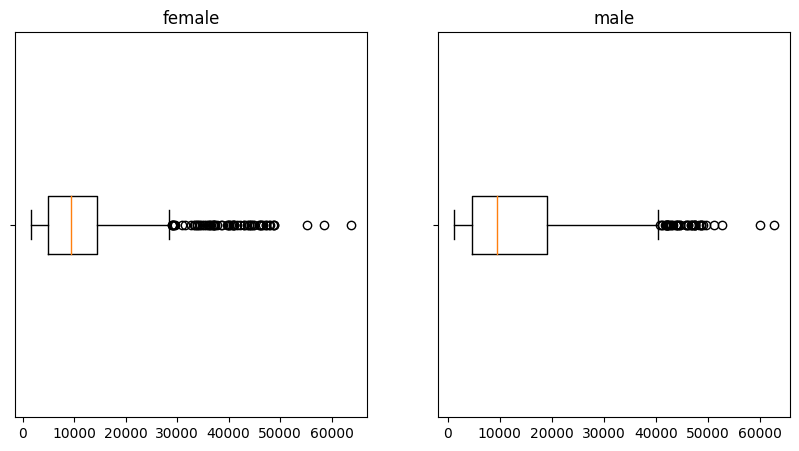

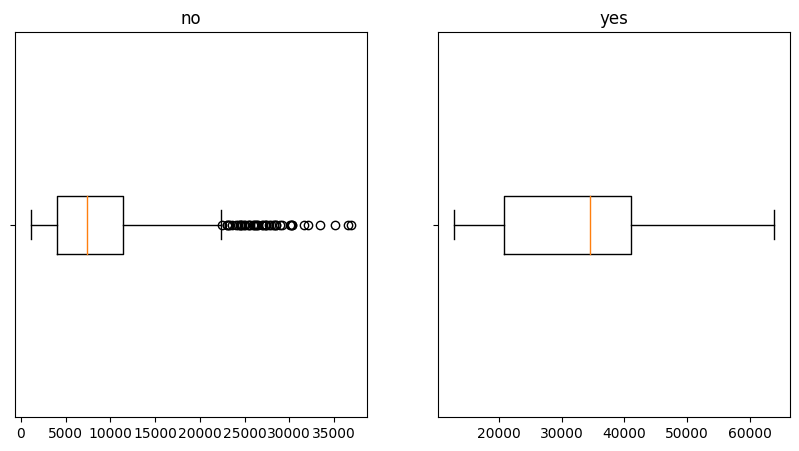

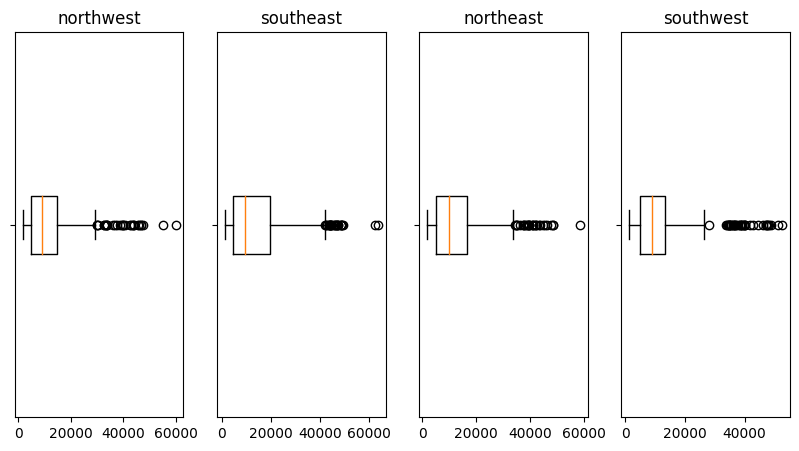

In [25]:
def create_box_plot_for_categorical_field(data: list[dict], field_name: str):
    """
    Create a box plot for each value of a categorical field in a list of dictionaries.

    Args:
        data (list): A list of dictionaries.
        field_name (str): The name of the field to create the box plot for.
    """
    from matplotlib import pyplot as plt

    unique_values = set([row[field_name] for row in data])
    fig, axes = plt.subplots(1, len(unique_values), figsize=(10, 5))

    for i, value in enumerate(unique_values):
        values = [float(row['charges']) for row in data if row[field_name] == value]
        axes[i].boxplot(values, vert=False)
        axes[i].set_title(value)
        axes[i].set_yticklabels([])

    plt.show()


for field in CATEGORICAL_FIELDS:
    create_box_plot_for_categorical_field(INSURANCE_DATA, field)

### Conclusion

In this notebook, I've found the statistics for the fields in the dataset and found the relationships between the fields.

The statistics I found were:
- Average
- Median
- Mode
- Standard Deviation
- Percentiles

The relationships I explored were:
- Age and BMI
- Age and Children
- Age and Charges
- BMI and Children
- BMI and Charges

I also found the relationship between the categorical fields and the charges.

This is the end of the project; I will not be analyzing the data that I've found, since that is not the purpose of this project.